In [ ]:
Hypothesis:
Numerical modeling can approximate the actual fluctuation in CO_2 levels in Alaskan rivers.

In [106]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy import optimize

In [61]:
ghg = pd.read_csv("Dissolved_GHG.csv")
ghg = ghg.replace(-9999.00, np.nan)
ghg = ghg.set_index(ghg.id)
ghg['date'] = pd.to_datetime(ghg["date"])
ghg

,#,id,location,river,latitude,longitude,date,season,discharge,co2,co2_f14c,co2_f14c_sd,co2_d13c,co2_d13c_sd,ch4,ch4_f14c,ch4_f14c_sd,ch4_d13c,ch4_d13c_sd
id,,,,,,,,,,,,,,,,,,,
SAG22-01,1,SAG22-01,Atigun Bridge,Atigun,68.4519,-149.3744,2022-06-05,Spring,24.95,6.542,0.803,0.001,-12.623,0.1,0.232,0.834,0.001,-59.277,0.1
SAG22-03,2,SAG22-03,Mining Area,Sagavanirktok,68.7695,-148.8492,2022-06-06,Spring,NaN,6.307,0.822,0.001,-12.824,0.1,0.031,1.178,0.038,NaN,NaN
SAG22-07,3,SAG22-07,USGS gaging sation near pump 3,Sagavanirktok,69.0161,-148.8203,2022-06-07,Spring,136.49,6.610,0.740,0.001,-13.167,0.1,0.008,0.989,0.013,NaN,NaN
SAG22-09,4,SAG22-09,Happy Valley,Sagavanirktok,69.1486,-148.8247,2022-06-07,Spring,NaN,NaN,0.737,0.001,-12.235,0.1,NaN,1.021,0.059,NaN,NaN
SAG22-15,5,SAG22-15,Spur Dike 3,Sagavanirktok,69.9612,-148.7187,2022-06-08,Spring,NaN,5.099,NaN,NaN,NaN,NaN,0.014,NaN,NaN,NaN,NaN
SAG22-17,6,SAG22-17,Endicott Bridge,Sagavanirktok,70.2484,-148.3033,2022-06-09,Spring,NaN,7.740,0.793,0.001,-12.799,0.1,0.046,0.996,0.003,NaN,NaN
KUP22-01,7,KUP22-01,Kuparuk River Delta,Kuparuk,70.3307,-149.0084,2022-06-09,Spring,234.18,8.252,0.926,0.001,-13.977,0.1,0.097,0.974,0.002,NaN,NaN
SAG22-19,8,SAG22-19,Atigun Bridge,Atigun,68.4519,-149.3744,2022-07-15,Summer,19.96,4.844,0.812,0.002,-12.591,0.1,0.306,0.846,0.001,-57.375,0.1
SAG22-20,9,SAG22-20,Mining Area,Sagavanirktok,68.7695,-148.8492,2022-07-16,Summer,NaN,6.305,0.792,0.001,-13.311,0.1,0.004,1.068,0.020,NaN,NaN


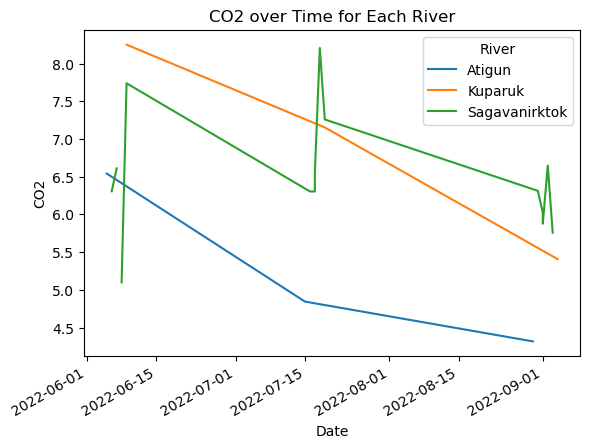

In [62]:
for name, group in ghg.groupby("river"):
    group.plot(x="date", y="co2", ax=plt.gca(), label=name) 

plt.xlabel("Date")
plt.ylabel("CO2")
plt.title("CO2 over Time for Each River")
plt.legend(title="River")
plt.show()


In [63]:
river = ghg[ghg.river == "Sagavanirktok"]
river

,#,id,location,river,latitude,longitude,date,season,discharge,co2,co2_f14c,co2_f14c_sd,co2_d13c,co2_d13c_sd,ch4,ch4_f14c,ch4_f14c_sd,ch4_d13c,ch4_d13c_sd
id,,,,,,,,,,,,,,,,,,,
SAG22-03,2,SAG22-03,Mining Area,Sagavanirktok,68.7695,-148.8492,2022-06-06,Spring,NaN,6.307,0.822,0.001,-12.824,0.1,0.031,1.178,0.038,NaN,NaN
SAG22-07,3,SAG22-07,USGS gaging sation near pump 3,Sagavanirktok,69.0161,-148.8203,2022-06-07,Spring,136.49,6.610,0.740,0.001,-13.167,0.1,0.008,0.989,0.013,NaN,NaN
SAG22-09,4,SAG22-09,Happy Valley,Sagavanirktok,69.1486,-148.8247,2022-06-07,Spring,NaN,NaN,0.737,0.001,-12.235,0.1,NaN,1.021,0.059,NaN,NaN
SAG22-15,5,SAG22-15,Spur Dike 3,Sagavanirktok,69.9612,-148.7187,2022-06-08,Spring,NaN,5.099,NaN,NaN,NaN,NaN,0.014,NaN,NaN,NaN,NaN
SAG22-17,6,SAG22-17,Endicott Bridge,Sagavanirktok,70.2484,-148.3033,2022-06-09,Spring,NaN,7.740,0.793,0.001,-12.799,0.1,0.046,0.996,0.003,NaN,NaN
SAG22-20,9,SAG22-20,Mining Area,Sagavanirktok,68.7695,-148.8492,2022-07-16,Summer,NaN,6.305,0.792,0.001,-13.311,0.1,0.004,1.068,0.020,NaN,NaN
SAG22-22,10,SAG22-22,USGS gaging sation near pump 3,Sagavanirktok,69.0161,-148.8203,2022-07-17,Summer,123.18,6.304,0.749,0.001,-12.949,0.1,0.042,1.035,0.028,NaN,NaN
SAG22-23,11,SAG22-23,Happy Valley,Sagavanirktok,69.1486,-148.8247,2022-07-17,Summer,NaN,6.558,0.747,0.001,-12.804,0.1,0.034,0.891,0.015,NaN,NaN
SAG22-27,12,SAG22-27,Spur Dike 3,Sagavanirktok,69.9612,-148.7187,2022-07-18,Summer,NaN,8.208,0.736,0.001,-12.957,0.1,0.006,1.090,0.015,NaN,NaN


Text(0, 0.5, '$CH_4/^{14}C$')

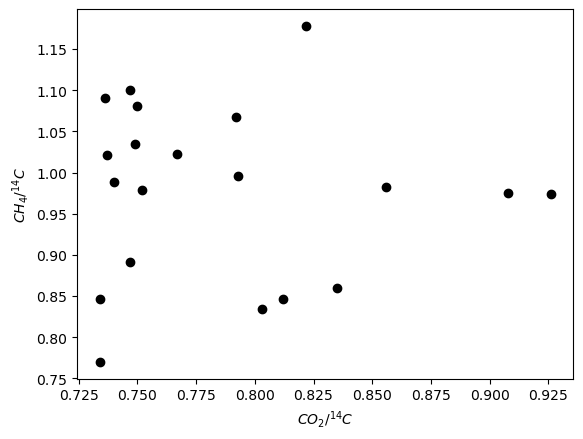

In [71]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(ghg["co2_f14c"], ghg["ch4_f14c"], 'ko')
plt.xlabel('$CO_2/^{14}C$')
plt.ylabel('$CH_4/^{14}C$')

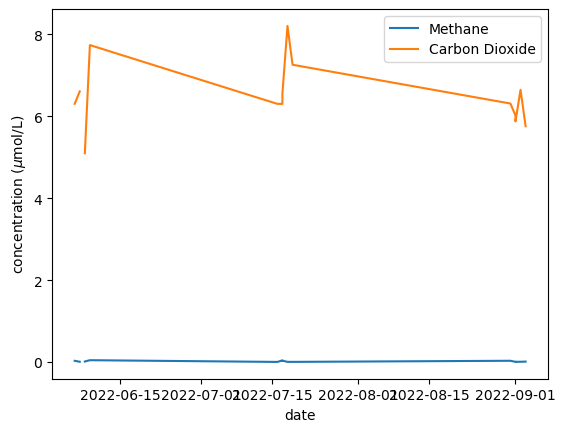

In [72]:
# analyze trends in greenhouse gas levels over time
fig = plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(river["date"], river["ch4"], label = "Methane")
plt.plot(river["date"], river["co2"], label = "Carbon Dioxide")
plt.xlabel('date')
plt.ylabel('concentration ($\mu$mol/L)')
plt.legend()

Text(0, 0.5, 'Latitude')

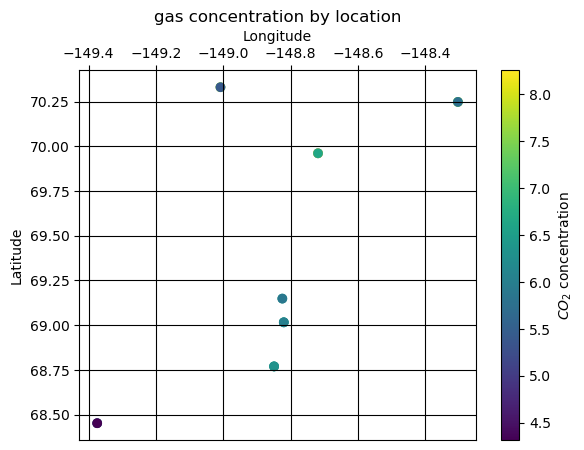

In [74]:
#Scatter plot or heatmap of gas concentrations at different locations along the rivers
plt.scatter(ghg["longitude"], ghg["latitude"], c = ghg["co2"])
plt.grid(True, c = "black")
plt.colorbar(label = "$CO_2$ concentration ($\mu$mol/L)")
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")
plt.title("gas concentration by location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [ ]:
def carbon_dioxide(t, C_co2, Q_in, V, P, k_g, C_atm, C_in):
    # Net flow effect
    inflow_effect = (Q_in / V) * (C_in - C_co2)  # Effect of inflow CO2
    # Outflow effect is implicit since it's assumed proportional to C_co2
    
    # Production and sink terms
    production = P / V                        # CO2 production from respiration
    sink = k_g / V * (C_co2 - C_atm)          # Loss to atmosphere

    # Total rate of change
    dC_co2_dt = inflow_effect + production - sink
    return dC_co2_dt

# Initial conditions and time range
Q_in = ghg["discharge"].mean()  # Average inflow rate
C_in = ghg["co2"].iloc[0]  # Initial inflow concentration 
V = 1e6  # Water volume in m³ 
P = 10  # CO2 production rate
k_g = 0.5  # Gas exchange coefficient 
C_atm = 0.4  
t0 = 0
tmax = 150
Dt = 10
t = np.arange(t0,tmax,Dt)

solution = solve_ivp(carbon_dioxide, t_span= [t0, tmax],y0 = [C_in],
    args=(Q_in, Q_out, V, P, k_g, C_atm, C_in), method="RK45", t_eval=t)

In [118]:
co2 = ghg.co2.dropna()
def cubfunc(x,a,b,c,d):
    y = a*x**3 + b*x**2 + c*x + d
    return y
    
t_ez = np.arange(t0,200,Dt)
mest_ez = optimize.curve_fit(cubfunc, xdata = t_ez, ydata = co2)[0]
mest_ez
y = mest_ez[0] * t_ez**3 + mest_ez[1] * t_ez **2 + mest_ez[2] * t_ez + mest_ez[3]

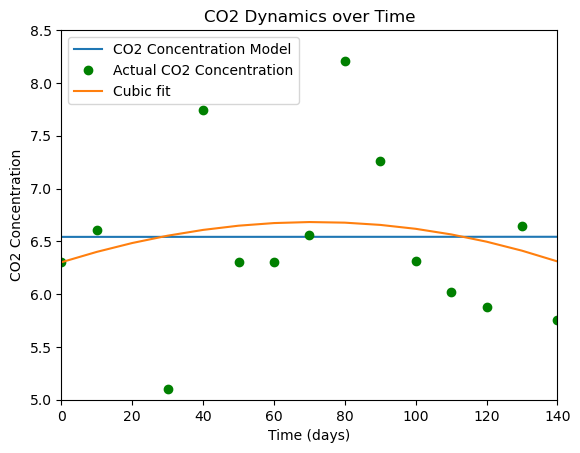

In [121]:
plt.plot(solution.t, solution.y[0], label="CO2 Concentration Model")
plt.plot(solution.t, river.co2, 'go', label = "Actual CO2 Concentration")
plt.plot(t_ez, y, label = "Cubic fit")
plt.axis([t0,140, 5,8.5])
plt.xlabel("Time (days)")
plt.ylabel("CO2 Concentration")
plt.title("CO2 Dynamics over Time")
plt.legend()
plt.show()